<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="250" height="250"><br>
</center>


 - (https://bit.ly/hg-03-1)







# K-최근접 이웃 회귀

- 핵심키워드
    - 회귀
    - k-최근접 이웃 회귀
    - 결정계수
    - 과대적합과 과소적합
    
지도 학습의 한 종류인 회귀 문제를 이해하고 k-최근접 이웃 알고리즘을 사용해 농어의 무게를 예측하는 회귀 문제를 풀어 보자.

### k-최근접 이웃 회귀

지도 학습 알고리즘은 크게 분류와 회귀(regression)으로 나뉜다. 분류는 2장에서 다루었다. 말 그대로 샘플을 몇 개의 클래스 중 하나로 분류하는 문제이다. 회귀는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제이다. 예를 들면 내년도 경제 성장률을 예측하거나 배달이 도착할 시간을 예측하는 것이 회귀 문제이다. 또 여기에서 주어진 문제처럼 농어의 무게를 예측하는 것도 회귀가 된다. 회귀는 정해진 클래스가 없고 임의의 수치를 출력한다.

k-최근접 이웃 분류 알고리즘은 분류와 회귀에 둘다 적용된다. 이 알고리즘은 간단하다. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다. 그 다음 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측한다. 다음 그림의 왼쪽에 k-최근접 이웃 분류가 잘 나타나 있다. k=3(샘플이 3개)이라 가정하면 사각형이 2개로 다수이기 때문에 새로운 샘플 x의 클래스는 사각형이 된다. k-최근접 이웃 회귀도 간단하다. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다. 하지만 회귀이기 때문에 이웃한 샘플의 타깃은 어떤 클래스가 아니라 임의의 수치이다. 이웃 샘플의 수치를 사용해 새로운 샘플 x의 타깃을 예측하는 간단한 방법은 뭐가 있을까? 바로 이 수치들의 평균을 구하면 된다. 그림에서 이웃한 샘플의 타깃값이 각각 100, 80, 60이고 이를 평균 하면 샘플 x의 예측 타깃값은 80이 된다. k-최근접 이웃 분류 알고리즘과 비슷하고, 타깃값을 결정할 때만 조금 다르다. 그럼 농어 데이터를 준비하고 사이킷런을 사용해 회귀 모델을 훈련하자.

### 데이터 준비

문저 훈련 데이터를 준비하자. 농어의 길이만 있어도 무게를 잘 예측할 수 있다고 생각했다. 그럼 농어의 길이가 특성이고 무게가 타깃이 된다. 2장 1절에서 파이썬 리스트에서 넘파이 배열로 변환했지만 여기서는 바로 넘파이 배열에서 만들겠다.


- http://bit.ly/perch_data 에서 데이터를 복사해서 쓰세요.



In [3]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

먼저 이 데이터가 어떤 형태를 띠고 있는지 산점도를 그려보겠다. 하나의 특성을 사용하기 때문에 특성 데이터를 x축에 놓고 타깃 데이러를 y축에 놓는다. 맷플롯립을 임포트하고 scatter() 함수를 사용하여 산점도를 그리자.

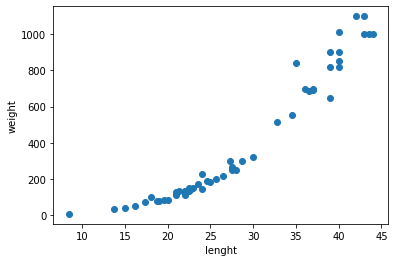

In [4]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

농어의 길이가 커짐에 따라 무게도 늘어남을 확인한다. 그래프를 그려보지 않아도 당연한 현상이다. 2장에서 했듯이 농어 데이터를 머신러닝 모델에 사용하기 전에 훈련 세트와 테스트 세트로 나누겠다.

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

사이킷런의 train_test_split()함수를 사용해 훈련 세트와 테스트 세트로 나눈다. 책과 결과를 동일하게 유지하기 위해 random_state=42로 지정했다. 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다는 점을 기억하자. perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열이다. 이런 1차원 배열을 1개의 열이 있는 2차원 배열로 바꿔야 한다. 파이썬에서 1차원 배열의 크기는 원소가 1개인 튜플로 나타낸다. 예를 들어 [1,2,3]의 크기는 (3, )이다. 이를 2차원 배열로 만들기 위해 억지로 하나의 열을 추가했다. 이렇게 하면 배열의 크기가 (3,1)이 된다. 배열을 나타내는 방식만 달라졌을 뿐 배열에 있는 원소의 개수는 동일하게 3개이다. 배열을 나타내는 방식만 달라졌을 뿐 배열에 있는 원소의 개수는 동일하게 3개이다.

2장에서 2개의 특성을 사용했기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했다. 이번 예제에서는 특성을 1개만 사용하므로 수동으로 2차원 배열을 만들어야 한다. 복잡하게 느껴지지만, 다행히 넘파이 배열은 크기를 바꿀 수 있는 reshape()메서드를 제공한다. 예를 들어 (4, )배열을
(2,2)크기로 바꿔보자.

In [6]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


test_array는 (4, )배열인 것을 확인 했으니 이제 (2,2) 크기로 바꿔 보겠다.

In [7]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


이처럼 reshape()메서드에는 바꾸려는 배열의 크기를 지정할 수 있다.

reshape() 메서드를 사용하는 방법은 어렵지 않다. 이제 이 메서드를 사용해 train_input과 test_input을 2차원 배열로 바꾸겠다. train_input의 크기는 (42, )이다. 이를 2차원 배열인 (42, 1)로 바꾸려면 train_input.reshape(42,1)과 같이 사용한다. 넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공한다. 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미이다. 예를 들어 첫 번째 크기를 나머지 원소 개수로 채우고, 두 번째 크기를 1로 하려면 train_input.reshape(-1,1)처럼 사용한다. 그럼 reshape()메서드로 배열의 크기를 변경하겠다.

In [9]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


2차원 배열로 성공적으로 변환했다. reshape(-1, 1)과 같이 사용하면 배열의 전체 원소 개수를 매번 외우지 않아도 되므로 편리하다. 이제 준비한 훈련 세트를 활용하여 k-최근접 이웃 알고리즘을 훈련시켜 보자.

### 결정계수(R²)  

사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor 이다. 이 클래스의 사용법은 KNeighborsClassifier와 매우 비슷하다. 객체를 생성하고 fit() 메서드로 회귀 모델을 훈련하겠다.

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knr =KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련한다.

knr.fit(train_input, train_target)

KNeighborsRegressor()

이제 테스트 세트의 점수를 확인해 보자.

In [12]:
print(knr.score(test_input, test_target))

0.992809406101064


오 아주 좋은 점수이다. 그런데 이 점수는 무엇일까? 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율이다. 정확도라고 불렀다. 간단히 말해 정답을 맞힌 개수의 비율이다. 회귀에서 정확한 숫자를 맞힌다는 것은 거의 불가능하다. 예측하는 값이나 타깃 모두 임의의 수치이기 때문이다. 회귀의 경우에는 조금 다른 값으로 평가하는데 이 점수를 결정계수(coefficient of determination)라고 부른다. 또는 간단히 R²라고도 부른다. 이름이 조금 어렵지만 계산 방식은 간단하다. 이 값은 다음과 같은 식으로 계산 된다. 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더한다. 그 다음 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눈다. 만약 타깃의 평균 정도를 예측하는 수준이라면 (즉 분자와 분모가 비슷해져) R²는 0에 가까워지고, 예측이 타깃에 아주 가까워지면 (분자가 0에 가까워 지기 때문에) 1에 가까운 값이 된다.

- score()메서드의 출력값의 의미 : 사이킷런의 score()메서드가 출력하는 값은 높을 수록 좋은 것이다. 예를 들어 정확도나 결정계수가 그렇다.만약 score()메서드가 에러율을 반환한다면 이를 음스로 만들어 실제로 낮은 에러가 score()메서드로 반환될 때는 높은 값이 되도록 바꾼다.

0.99면 아주 좋은 값이다. 하지만 정확도처럼 R²가 직감적으로 얼마나 좋은지 이해하기는 어렵다. 대신 다른 값을 계산해 보자. 타깃과 예측한 값 사이의 차이를 구해 보면 어느 정도 예측이 벗어났는지 가늠하기 좋다. 사이킷런은 sklearn.metrics 패키지 아래 여러 가지 측정 도구를 제공한다. 이 중에서 mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환 한다.

In [13]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 텟스트 세트에 대한 평균 절댓값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다. 지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했다. 그런데 훈련 세트를 사용해 평가해 보면 어떨까? 즉 score() 메서드에 훈련 세트를 전달하여 점수를 출력해 보는 것이다. 이 값은 테스트 세트의 점수와 다를 것이다. 여기에서 우리가 배울 수 있는 것이 있을지도 모르겠다.

### 과대접합 vs 과소접합

앞에서 훈련한 모델을 사용해 훈련 세트와 R²점수를 확인하겠다.

In [14]:
print(knr.score(train_input, train_target))

0.9698823289099254


앞에서 테스트 세트를 사용한 점수와 비교해 보자. 어떤 값이 더 높은가? 이상한 점을 찾았나? 왜그럴까? 

모델을 훈련 세트에 훈련하면 훈련 세트에 맞 맞는 모델이 만들어진다. 이 모델을 훈련 세트와 테스트 세트에서 평가하면 두 값중 어느 것이 높을까? 보통 훈련 세트의 점수가 조금 더 높게 나온다. 왜냐하면 훈련 세트에서 모델을 훈련했으므로 훈련 세트에서 더 좋은 점수가 나온다.

만약 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 과대적합overfitting 되었다고 말한다. 즉 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않을 것이다. 훈련 세트에만 잘 맞는 모델을 원하지는 않는다.

반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 어떨까? 이런 경우를 모델이 훈련 세트에 과소적합underfitting 되었다고 말한다. 즉 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우이다. 훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요하다.

앞서 k-최근접 이웃 회귀로 평가한 훈련 세트와 테스트 세트의 점수는 어떤가? 훈련세트보다 테스트 세트의 점수가 높으니 과소적합니다. 이문제를 어떻게 해결해야할까? 모델을 조금 더 복잡하게 만들면 된다. 즉 훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아질 것이다. k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것이다. 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것이다. 여기에서 사이킷런의 k-최근접 이웃 알고리즘의 기본 k 값은 5이다. 이를 3으로 낮추어 보자.

이전 장에서 설명한 것처럼 사이킷러의 k-최근접 이웃 클래스는 이웃의 개수를 바꾸기 위해 클래스 객체를 다시 만들 필요가 없다. 그냥 n_neighbors 속성값을 바꾸면 된다.

In [15]:
# 이웃의 개수를 3으로 설정한다.
knr.n_neighbors = 3

# 모델을 다시 훈련한다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


k 값을 줄였더니 훈련 세트의 R² 점수가 높아졌다 그럼 이제 테스트 세트의 점수를 확인해 보자.

In [16]:
print(knr.score(test_input, test_target))

0.9746459963987609


예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과속적합 문제를 해결한 것 같다. 또한 두 점수의 차이가 크지 않으므로 이 모델이 과대적합 된 것 같지도 않다. 이 모델이 테스트 세트와 추가될 농어 데이터에도 일반화를 잘하리라 예상할 수 있다. 좋다. 성공적으로 회귀 모델을 훈련 했다.

### 회귀 문제 다루기 - 문제해결 과정

농어의 높이,길이 등의 수치로 무게를 예측해 달라는 요청을 했다. 이 문제는 분류가 아니라 회귀 문제이다. 회귀는 임의의 수치를 예측하는 문제이다. 농어의 길이를 사용해 무게를 예측하는 k-최근접 이웃 회귀 모델을 만들었다.

k-최근접 이웃 회귀 모델은 분류와 동일하게 가장 먼저 가까운 k개의 이웃을 찾는다. 그 다음 이웃 샘플의 타깃값을 평균하여 이 샘플의 예측값으로 사용한다.

사이킷런은 회귀 모델의 점수로 R², 즉 결정계수 값을 반환한다. 이 값은 1에 가까울수록 좋다. 정량적인 평가를 하고 싶다면 사이킷헌에서 제공하는 다른 평가 도구를 사용할 수 있다. 대표적으로 절댓값 오차가 있다.

모델을 훈련하고 나서 훈련세트와 테스트 세트에 대해 모두 평가 점수를 구할 수 있다. 훈련 세트의 점수와 테스트 세트의 점수 차이가 크면 좋지 않다. 일반적으로 훈련 세트의 점수가 테스트 세트보다 조금더 높다. 만약 테스트 세트의 점수가 너무 낮다면 모델이 훈련 세트에 과도하게 맞춰진 것이다. 이를 과대적합이라고 한다. 반대로 테스트 세트 점수가 너무 높거나 두 점수가 모두 낮으면 과소 적합니다.

과대적합일 경우 모델을 덜 복잡하게 만들어야한다. k-최근접 이웃의 경우 k값을 늘린다. 과소적합일 경우 모델을 더 복잡하게 만들어야한다. k-최근접 이웃의 경우 k값을 줄인다.

> 전체 소스 코드  -https://bit.ly/hg-03-1

In [50]:
# k-최근접 이웃 회귀

# 데이터 준비
import numpy as np

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

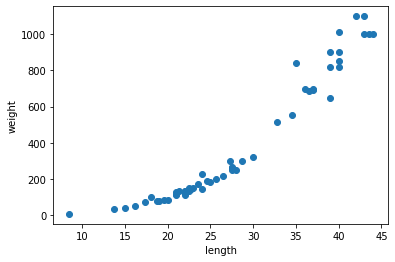

In [51]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 길이에 따른 무게 증가 확인

In [52]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [53]:
print(train_input.shape)

(42,)


In [54]:
print(test_input.shape)

(14,)


In [55]:
print(test_input)

[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]


In [56]:
#머신러닝을 사용하기 위해 2차원 배열로 만든다. reshape() 함수 사용
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [57]:
# 결정계수 

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련한다.

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [58]:
print(knr.score(test_input, test_target))

0.992809406101064


In [59]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만든다
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


- 결과에서 예측이 평균적으로 19g정도 타깃값과 다르다는 것을 알 수 있다.

In [60]:
# 과대적합 vs 과소적합
# 훈련세트 점수확인
print(knr.score(train_input, train_target))

0.9698823289099254


In [61]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [62]:
print(knr.score(test_input, test_target))

0.9746459963987609
